### Extracción de Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

Note: you may need to restart the kernel to use updated packages.


In [2]:
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
print ("Carga de datos exitosa")

Carga de datos exitosa


In [3]:
try:
    respuesta = requests.get(url_data)
    respuesta.raise_for_status()  # Verifica si la solicitud fue exitosa (código 200)
    datos = pd.DataFrame(respuesta.json())
    print("Datos cargados correctamente.")
except requests.exceptions.RequestException as e:
    print(f"Error al cargar los datos: {e}")

Datos cargados correctamente.


In [4]:
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [5]:
#Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 100  # Aumenta la resolución de los gráficos
plt.rcParams['font.size'] = 12  # Tamaño de fuente por defecto
print("Configuración de estilo aplicada para los gráficos.")

Configuración de estilo aplicada para los gráficos.


### Limpieza y Procesamiento de Datos

In [6]:
# Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos.
num_duplicados = datos['customerID'].duplicated().sum()
if num_duplicados > 0:
    datos = datos.drop_duplicates(subset=['customerID'])
    print(f"Se eliminaron {num_duplicados} filas duplicadas basadas en 'customerID'.")
else:
    print("No se encontraron filas duplicadas basadas en 'customerID'.")

No se encontraron filas duplicadas basadas en 'customerID'.


In [10]:
# Identificar y acomodar columnas basado en el diccionario de datos.
columnas_a_aplanar = []
for col in datos.columns:
    if len(datos) > 0 and pd.notna(datos[col].iloc[0]) and isinstance(datos[col].iloc[0], dict):
        columnas_a_aplanar.append(col)

if columnas_a_aplanar:
    print(f"Columnas identificadas con diccionarios que necesitan ser aplanadas: {columnas_a_aplanar}")
    for col_dict in columnas_a_aplanar:
        print(f"Aplanando la columna '{col_dict}'...")
        # Normalizar el JSON y prefijar las nuevas columnas para evitar conflictos
        df_temp = pd.json_normalize(datos[col_dict])
        df_temp.columns = [f"{col_dict}_{sub_col}" for sub_col in df_temp.columns]
        datos = pd.concat([datos.drop(columns=[col_dict]), df_temp], axis=1)
    print("¡Columnas aplanadas con éxito!")
else:
    print("No se encontraron columnas de diccionario para aplanar.")

print("\nNombres de todas las columnas DESPUÉS del aplanamiento:")
print(datos.columns.tolist())

# --- Tratamiento específico de 'TotalCharges' ---
# Identificamos el nombre real de la columna TotalCharges después del aplanamiento
nombre_columna_cargos_totales = 'account_Charges.Total' # Nombre esperado tras el aplanamiento de 'account'

if nombre_columna_cargos_totales in datos.columns:
    print(f"\n--- Intentando convertir '{nombre_columna_cargos_totales}' a numérico y manejando vacíos/nulos: ---")
    # Convertir a numérico, forzando errores a NaN
    datos[nombre_columna_cargos_totales] = pd.to_numeric(datos[nombre_columna_cargos_totales], errors='coerce')

    # Contar y rellenar los valores nulos que resultaron de la conversión
    null_count_tc = datos[nombre_columna_cargos_totales].isnull().sum()
    if null_count_tc > 0:
        print(f"Se encontraron {null_count_tc} valores nulos en '{nombre_columna_cargos_totales}' después de la conversión.")
        print(f"Rellenando los valores nulos con 0 para '{nombre_columna_cargos_totales}'.")
        datos[nombre_columna_cargos_totales].fillna(0, inplace=True)
    else:
        print(f"No se encontraron valores nulos en '{nombre_columna_cargos_totales}' después de la conversión.")
else:
    print(f"\n¡La columna '{nombre_columna_cargos_totales}' NO se encontró en el DataFrame después del aplanamiento!")
    print("Por favor, revisa los nombres de las columnas para encontrar el correcto.")

print("\nTipos de datos después del aplanamiento y limpieza de 'TotalCharges':")
datos.info()


No se encontraron columnas de diccionario para aplanar.

Nombres de todas las columnas DESPUÉS del aplanamiento:
['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']

--- Intentando convertir 'account_Charges.Total' a numérico y manejando vacíos/nulos: ---
Se encontraron 11 valores nulos en 'account_Charges.Total' después de la conversión.
Rellenando los valores nulos con 0 para 'account_Charges.Total'.

Tipos de datos después del aplanamiento y limpieza de 'TotalCharges':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (t

C:\Users\hp\AppData\Local\Temp\ipykernel_37216\1096036398.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos[nombre_columna_cargos_totales].fillna(0, inplace=True)


### Estandarización de Variables

In [ ]:
# 1. Creación de la columna 'Cuentas_Diarias'
columna_facturacion_mensual = 'account_Charges.Monthly'
if columna_facturacion_mensual in datos.columns:
    dias_en_mes = 30
    datos['Cuentas_Diarias'] = pd.to_numeric(datos[columna_facturacion_mensual], errors='coerce') / dias_en_mes
    datos['Cuentas_Diarias'].fillna(0, inplace=True)

    print(f"Columna 'Cuentas_Diarias' creada y calculada a partir de '{columna_facturacion_mensual}'.")
    print("Primeras 5 filas con la nueva columna:")
    print(datos[['customerID', columna_facturacion_mensual, 'Cuentas_Diarias']].head())
else:
    print(f"Error: La columna '{columna_facturacion_mensual}' no se encontró. No se pudo crear 'Cuentas_Diarias'.")

# 2. Convertir valores binarios (Sí/No, Male/Female, etc.) a 1 y 0
mapeos_binarios = {
    'Yes': 1, 'No': 0,
    'Male': 1, 'Female': 0,
    'No phone service': 0,
    'No internet service': 0
}

# Columnas binarias a transformar
columnas_binarias_a_transformar = [
    'Churn',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling',
    'customer_gender'
]

for col in columnas_binarias_a_transformar:
    if col in datos.columns and datos[col].dtype == 'object': 
        print(f"Procesando columna binaria '{col}' (Valores únicos antes: {datos[col].unique()})...")
        datos[col] = datos[col].replace(mapeos_binarios)
        print(f"Valores únicos después: {datos[col].unique()}")
    elif col in datos.columns:
        print(f"Columna '{col}' ya es numérica o no es un objeto, saltando conversión binaria.")
    else:
        print(f"Advertencia: Columna '{col}' no encontrada para conversión binaria.")


# Después de intentar mapear 'Churn', verifica y maneja los valores restantes no numéricos
if 'Churn' in datos.columns and (datos['Churn'] == '').any():
    print("\nDetectados valores vacíos (cadenas vacías) en la columna 'Churn'.")
    # Convertir cadenas vacías a NaN y luego eliminar las filas con NaN
    original_rows = datos.shape[0]
    datos['Churn'] = datos['Churn'].replace('', np.nan)
    datos.dropna(subset=['Churn'], inplace=True)
    datos['Churn'] = datos['Churn'].astype(int) # Asegurarse de que sea int
    print(f"Se eliminaron {original_rows - datos.shape[0]} filas con 'Churn' vacío. Nueva cantidad de filas: {datos.shape[0]}.")
    print(f"Valores únicos de 'Churn' después de limpieza: {datos['Churn'].unique()}")



# 3. Renombrar columnas para mayor claridad
nuevos_nombres_columnas = {
    'customerID': 'ID_Cliente',
    'customer_gender': 'Genero_Cliente',
    'customer_SeniorCitizen': 'Cliente_TerceraEdad',
    'customer_Partner': 'Cliente_Pareja',
    'customer_Dependents': 'Cliente_Dependientes',
    'customer_tenure': 'Antiguedad_Meses',
    'phone_PhoneService': 'Servicio_Telefono',
    'phone_MultipleLines': 'Multiples_Lineas',
    'internet_InternetService': 'Servicio_Internet',
    'internet_OnlineSecurity': 'Seguridad_Online',
    'internet_OnlineBackup': 'Respaldo_Online',
    'internet_DeviceProtection': 'Proteccion_Dispositivo',
    'internet_TechSupport': 'Soporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Peliculas',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Facturacion_Electronica',
    'account_PaymentMethod': 'Metodo_Pago',
    'account_Charges.Monthly': 'Cargos_Mensuales',
    'account_Charges.Total': 'Cargos_Totales',
}

# Aplicar el renombramiento. Usamos .copy() para evitar SettingWithCopyWarning
df_clientes = datos.rename(columns=nuevos_nombres_columnas).copy()

print("Columnas renombradas. Nuevos nombres (primeras 20):")
print(df_clientes.columns.tolist()[:20]) # Mostrar solo las primeras para no abrumar

print("\nTipos de datos después de la estandarización y transformación:")
df_clientes.info()
print("\nPrimeras 5 filas del DataFrame transformado:")
print(df_clientes.head())

C:\Users\hp\AppData\Local\Temp\ipykernel_37216\414727853.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos['Cuentas_Diarias'].fillna(0, inplace=True)


Columna 'Cuentas_Diarias' creada y calculada a partir de 'account_Charges.Monthly'.
Primeras 5 filas con la nueva columna:
   customerID  account_Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO                     65.6         2.186667
1  0003-MKNFE                     59.9         1.996667
2  0004-TLHLJ                     73.9         2.463333
3  0011-IGKFF                     98.0         3.266667
4  0013-EXCHZ                     83.9         2.796667
Columna 'Churn' ya es numérica o no es un objeto, saltando conversión binaria.
Columna 'customer_Partner' ya es numérica o no es un objeto, saltando conversión binaria.
Columna 'customer_Dependents' ya es numérica o no es un objeto, saltando conversión binaria.
Columna 'phone_PhoneService' ya es numérica o no es un objeto, saltando conversión binaria.
Columna 'phone_MultipleLines' ya es numérica o no es un objeto, saltando conversión binaria.
Columna 'internet_OnlineSecurity' ya es numérica o no es un objeto, saltando conversión binari

### Análisis Gráficos de Variables Cuantitativas o Numéricas

***Distribución del Abandono***

                          count         mean          std        min  \
Churn                    7043.0     0.265370     0.441561   0.000000   
Genero_Cliente           7043.0     0.504756     0.500013   0.000000   
Cliente_TerceraEdad      7043.0     0.162147     0.368612   0.000000   
Cliente_Pareja           7043.0     0.483033     0.499748   0.000000   
Cliente_Dependientes     7043.0     0.299588     0.458110   0.000000   
Antiguedad_Meses         7043.0    32.371149    24.559481   0.000000   
Servicio_Telefono        7043.0     0.903166     0.295752   0.000000   
Multiples_Lineas         7043.0     0.421837     0.493888   0.000000   
Seguridad_Online         7043.0     0.286668     0.452237   0.000000   
Respaldo_Online          7043.0     0.344881     0.475363   0.000000   
Proteccion_Dispositivo   7043.0     0.343888     0.475038   0.000000   
Soporte_Tecnico          7043.0     0.290217     0.453895   0.000000   
Streaming_TV             7043.0     0.384353     0.486477   0.00

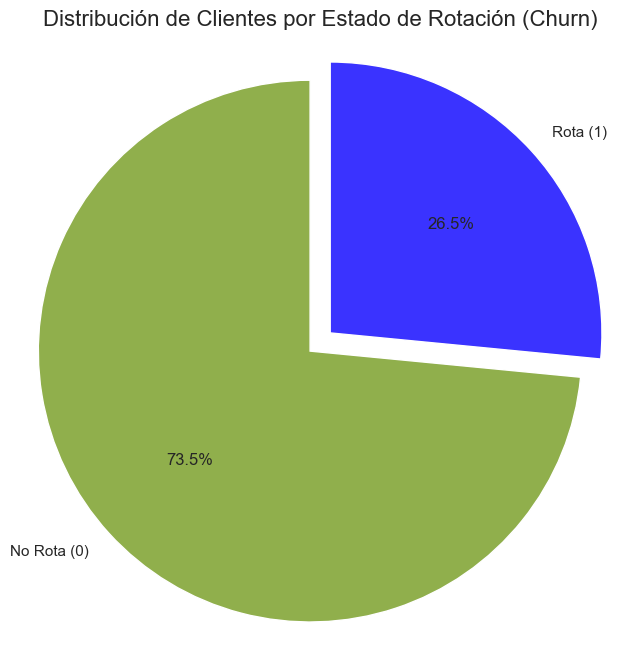

C:\Users\hp\AppData\Local\Temp\ipykernel_37216\117801856.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_clientes, palette=['#90AF4C', '#3A33FF'] if len(churn_counts) == 2 else 'viridis')


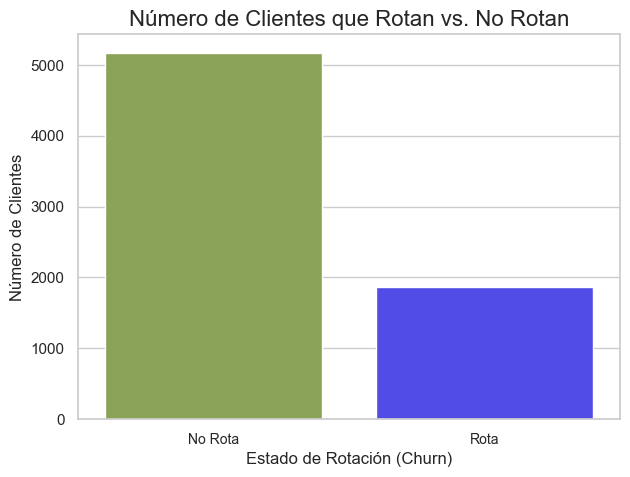

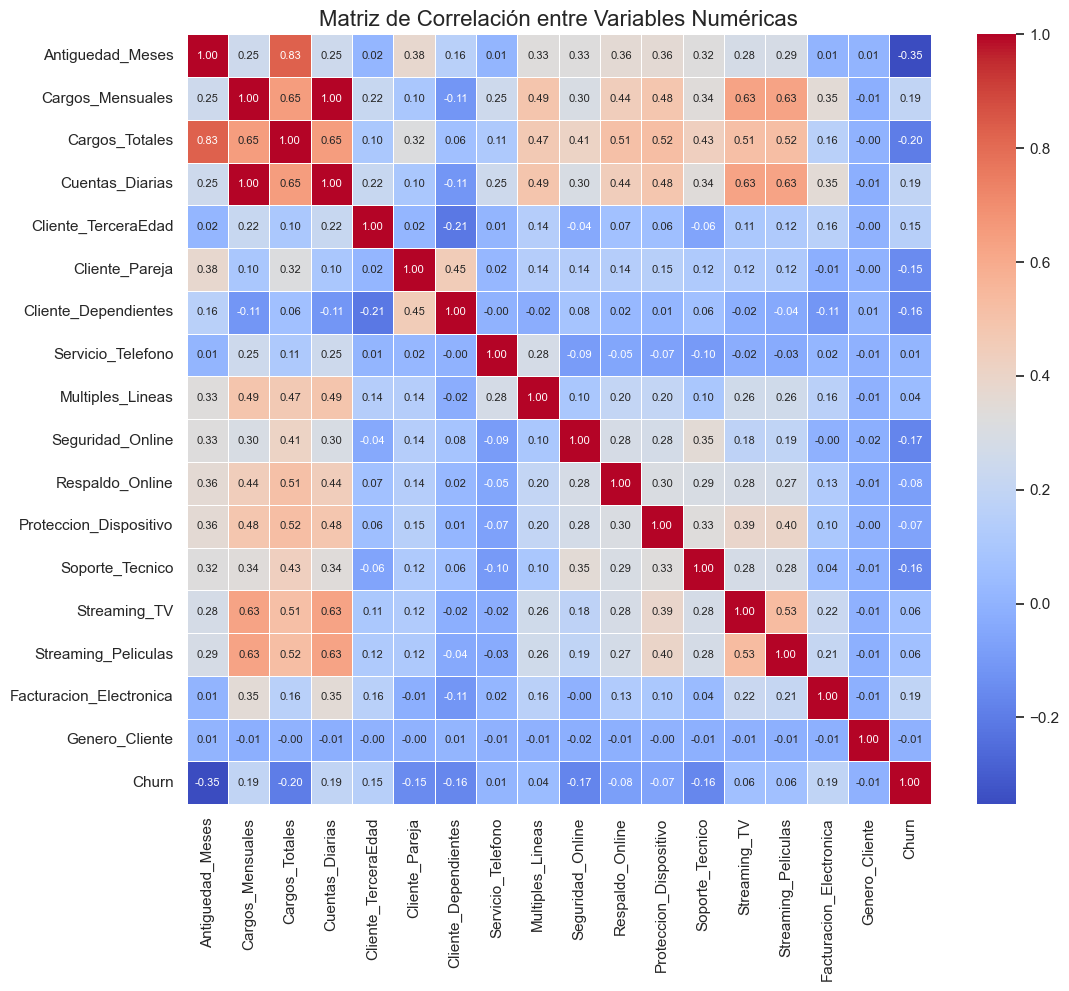


--- Análisis Dirigido: Churn por variables categóricas ---

Analizando 'Genero_Cliente' en relación con 'Churn'


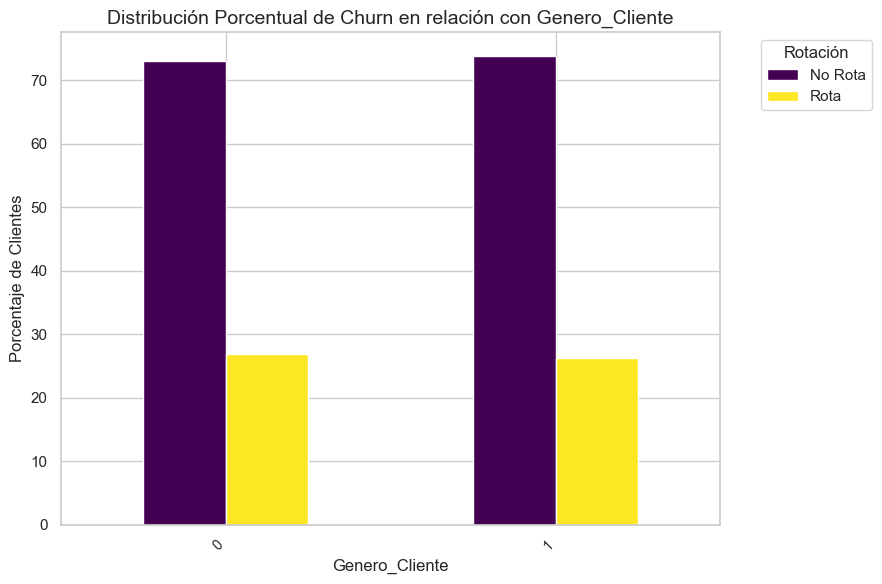


Analizando 'Cliente_TerceraEdad' en relación con 'Churn'


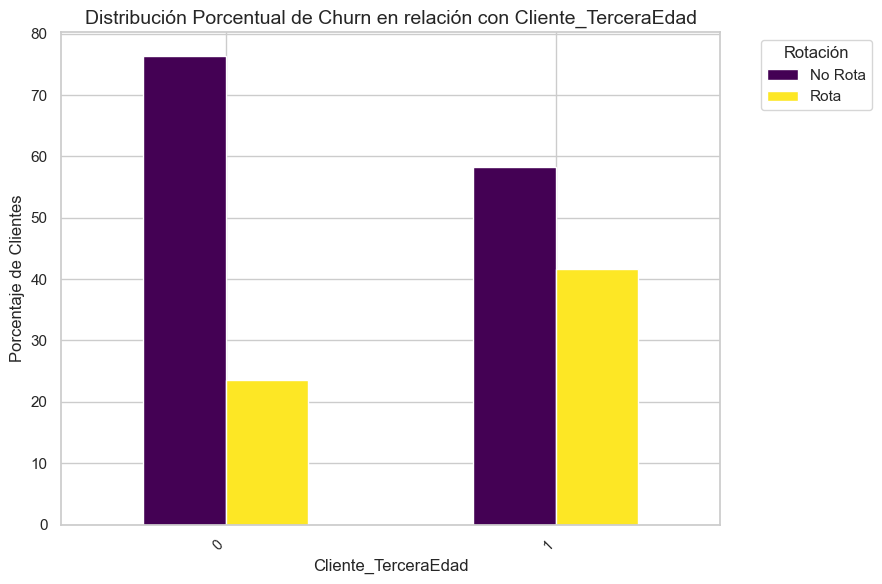


Analizando 'Cliente_Pareja' en relación con 'Churn'


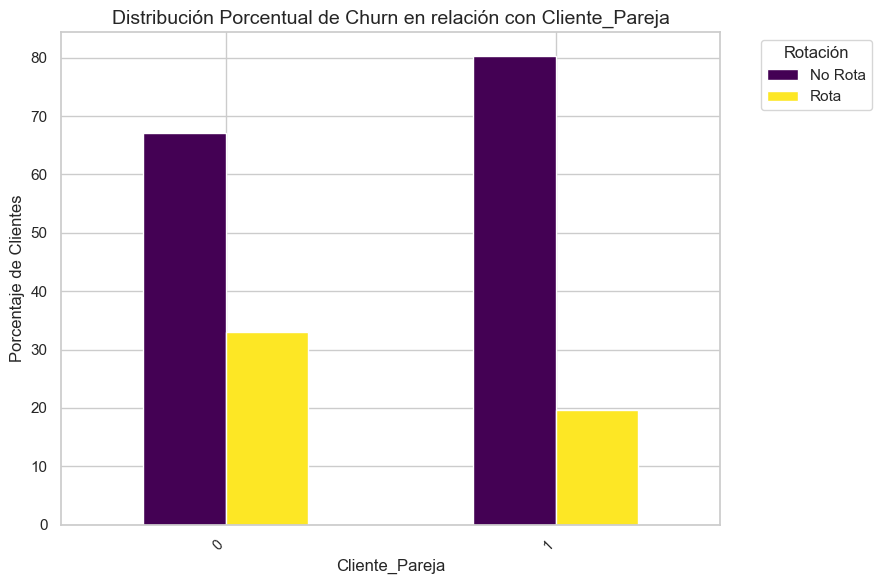


Analizando 'Cliente_Dependientes' en relación con 'Churn'


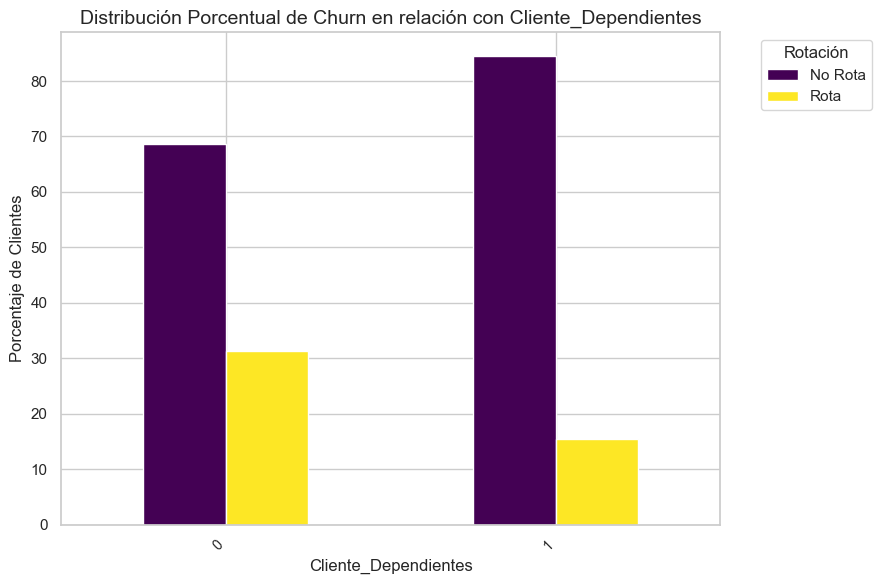


Analizando 'Servicio_Telefono' en relación con 'Churn'


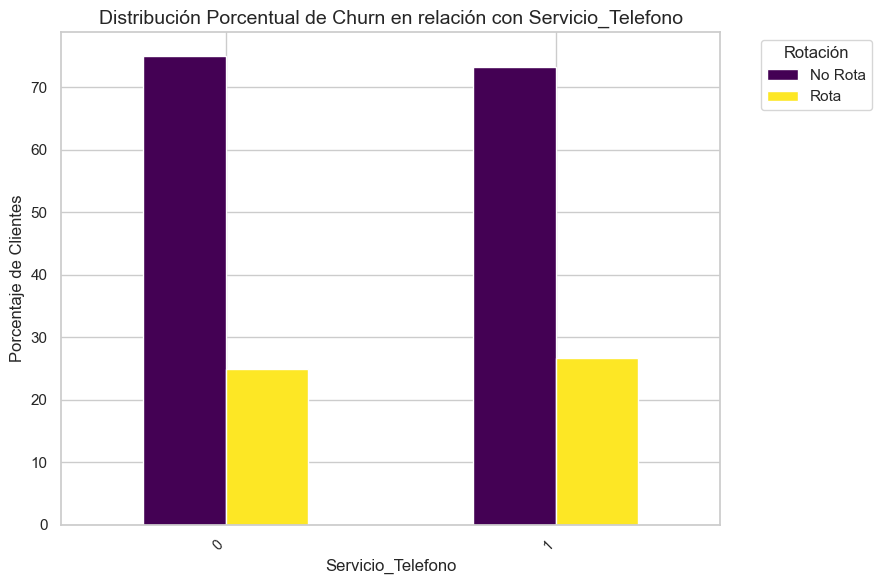


Analizando 'Multiples_Lineas' en relación con 'Churn'


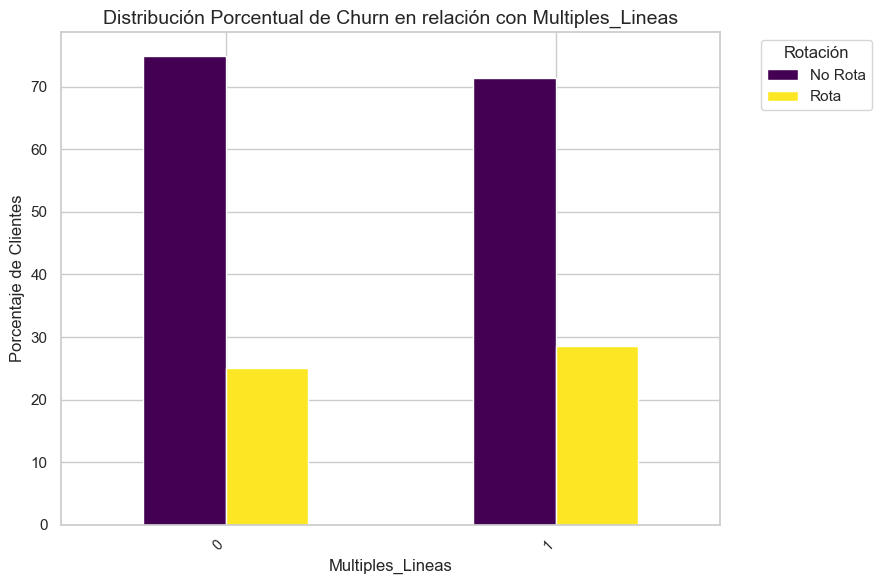


Analizando 'Servicio_Internet' en relación con 'Churn'


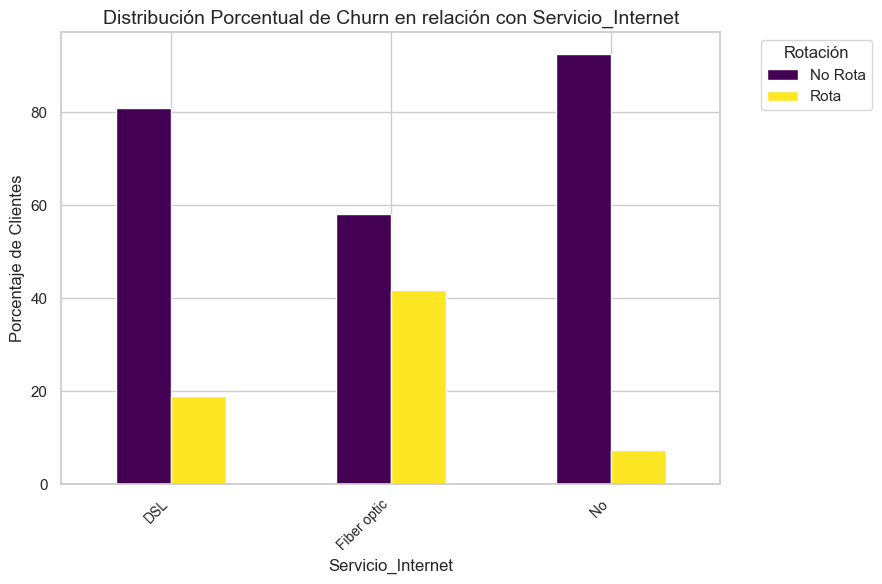


Analizando 'Seguridad_Online' en relación con 'Churn'


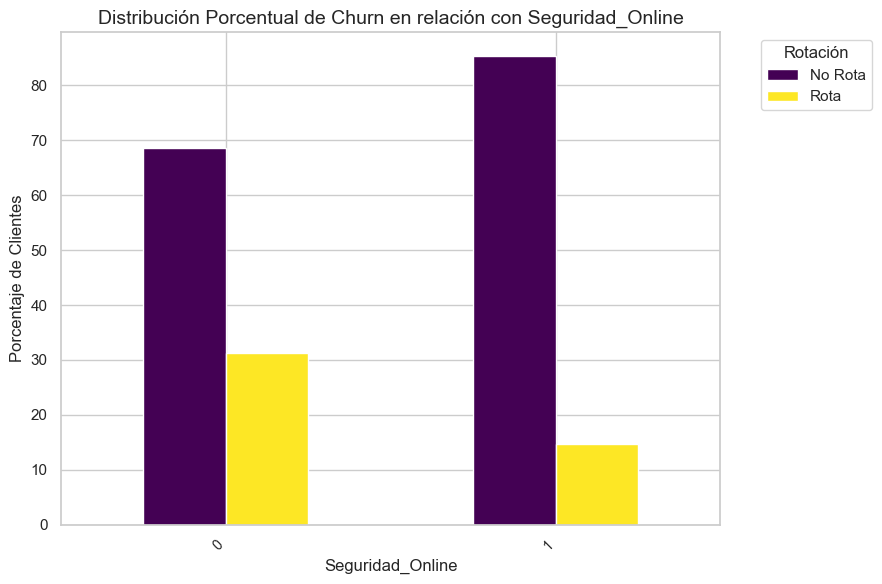


Analizando 'Respaldo_Online' en relación con 'Churn'


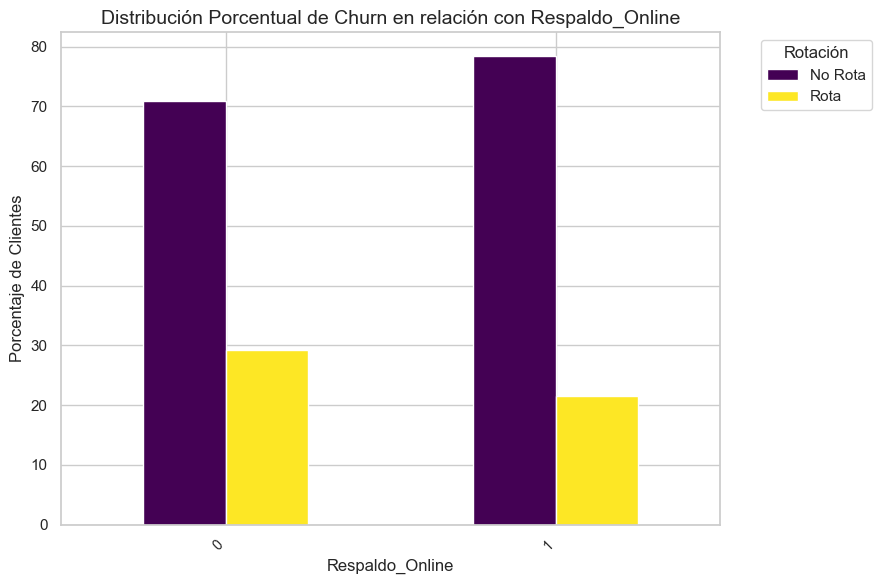


Analizando 'Proteccion_Dispositivo' en relación con 'Churn'


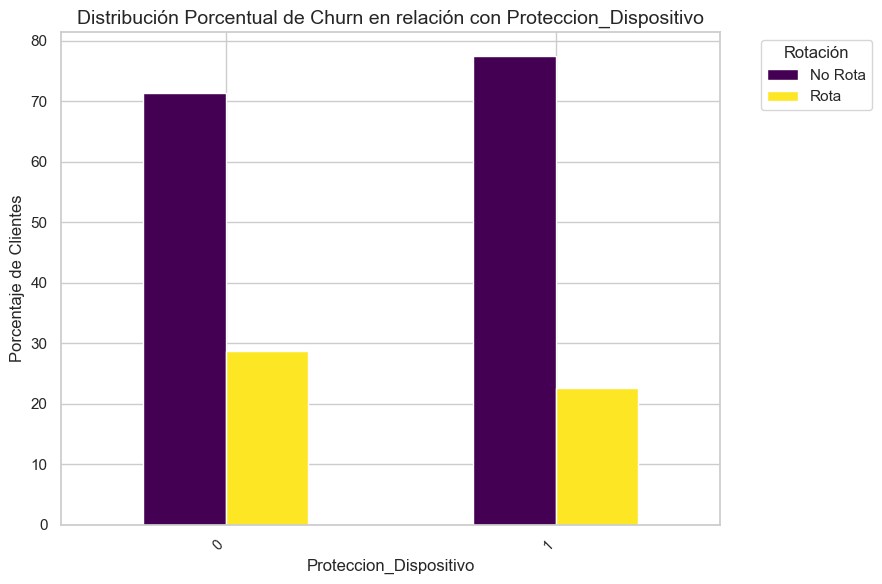


Analizando 'Soporte_Tecnico' en relación con 'Churn'


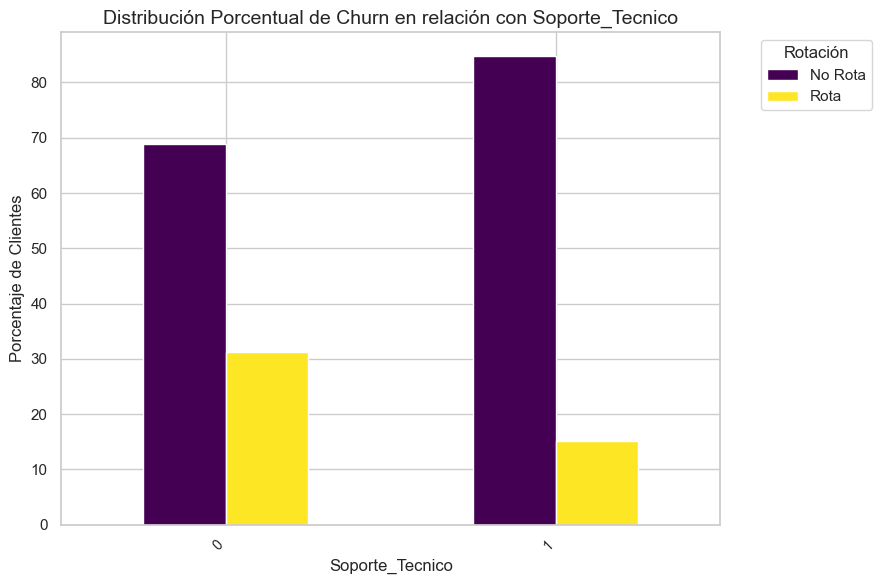


Analizando 'Streaming_TV' en relación con 'Churn'


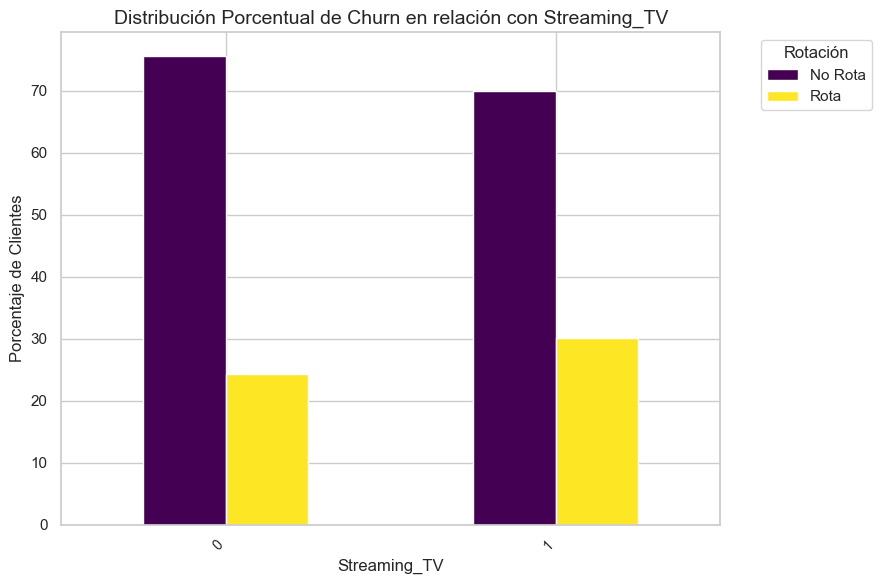


Analizando 'Streaming_Peliculas' en relación con 'Churn'


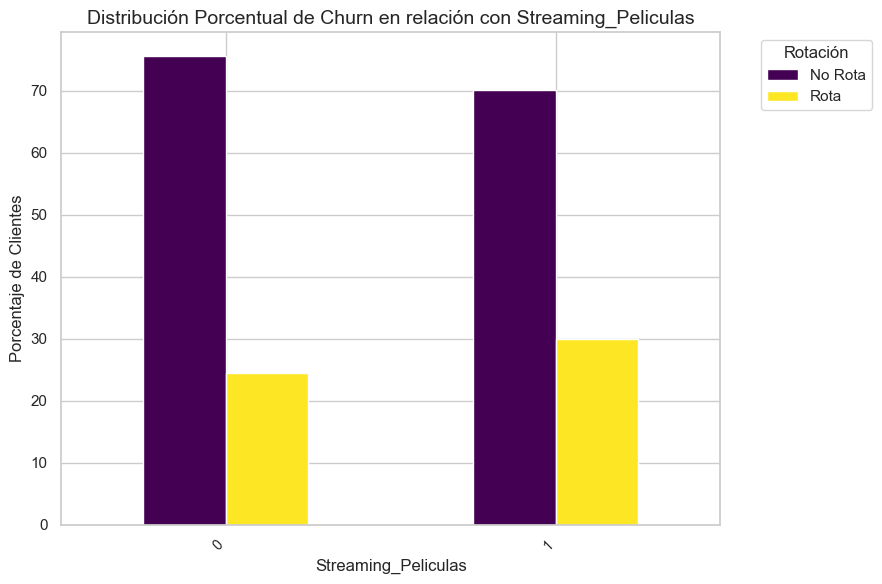


Analizando 'Tipo_Contrato' en relación con 'Churn'


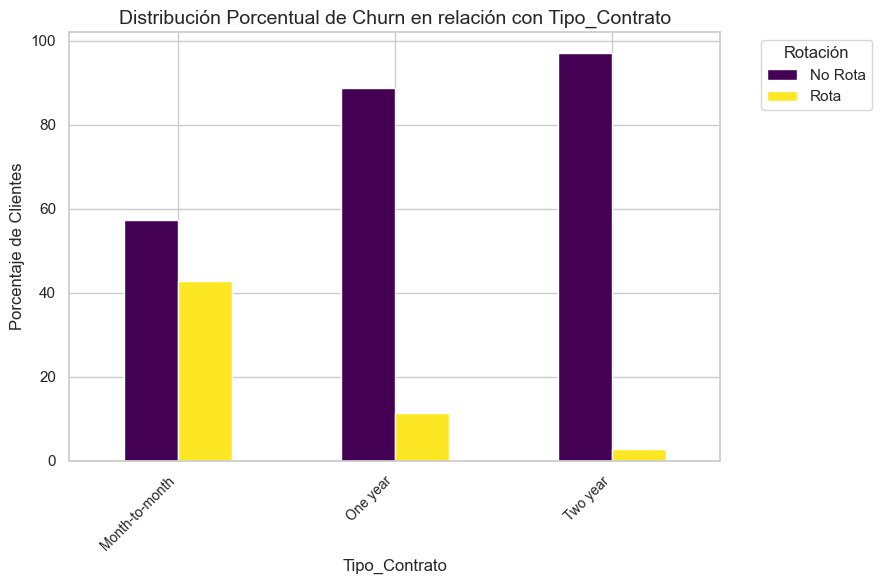


Analizando 'Facturacion_Electronica' en relación con 'Churn'


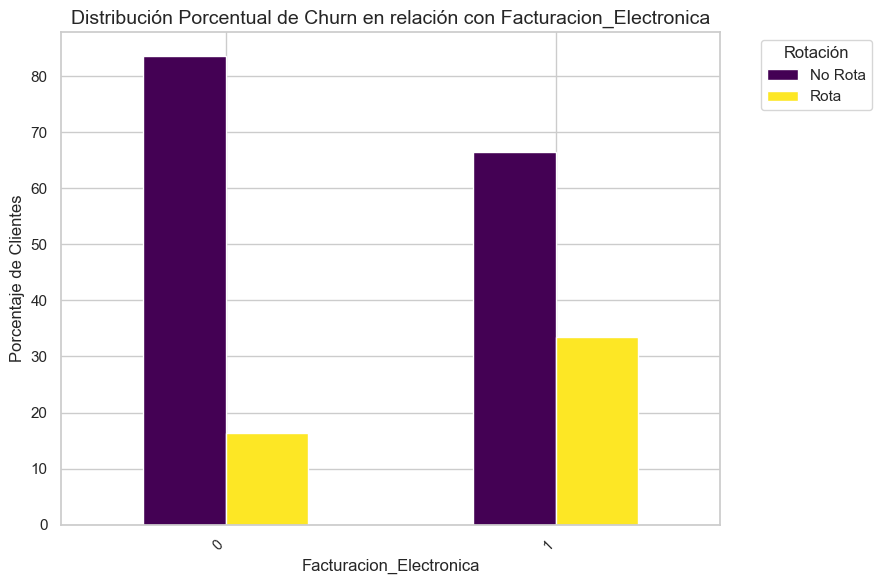


Analizando 'Metodo_Pago' en relación con 'Churn'


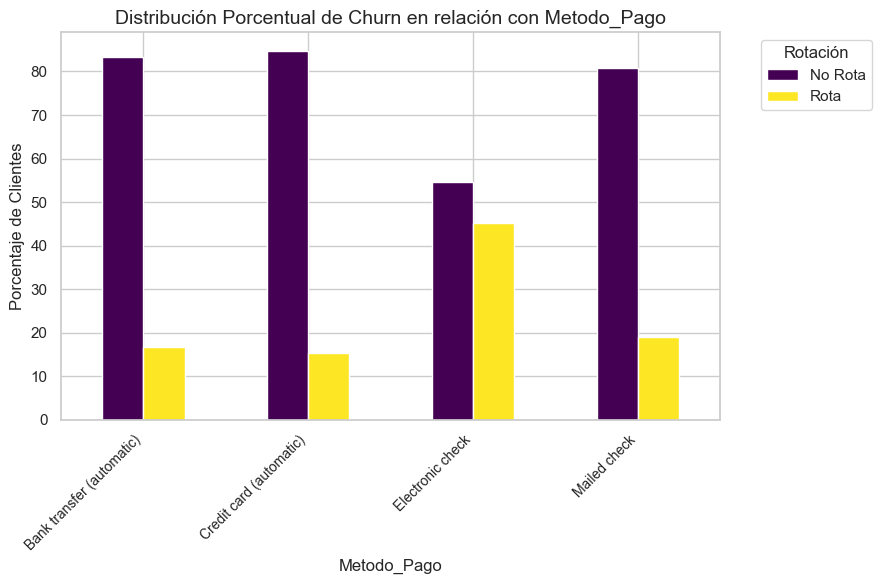


Analizando 'Antiguedad_Meses' en relación con 'Churn'


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\117801856.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='viridis')


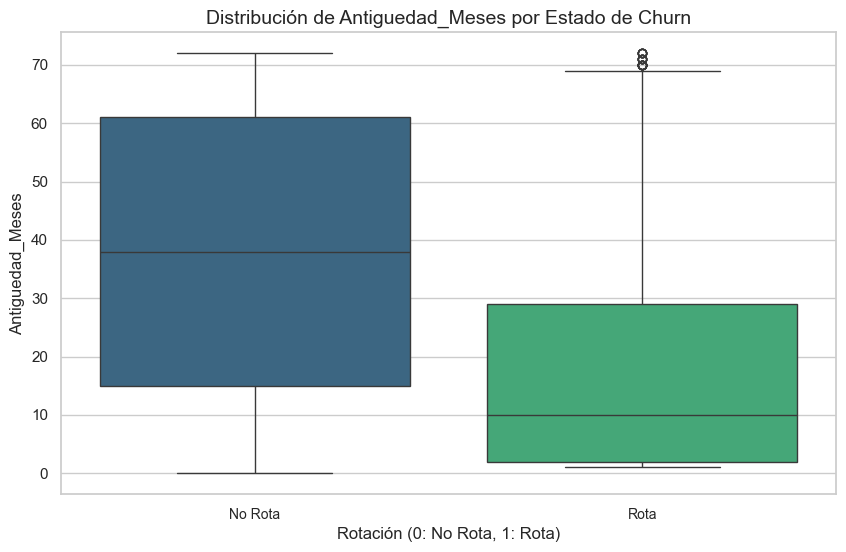

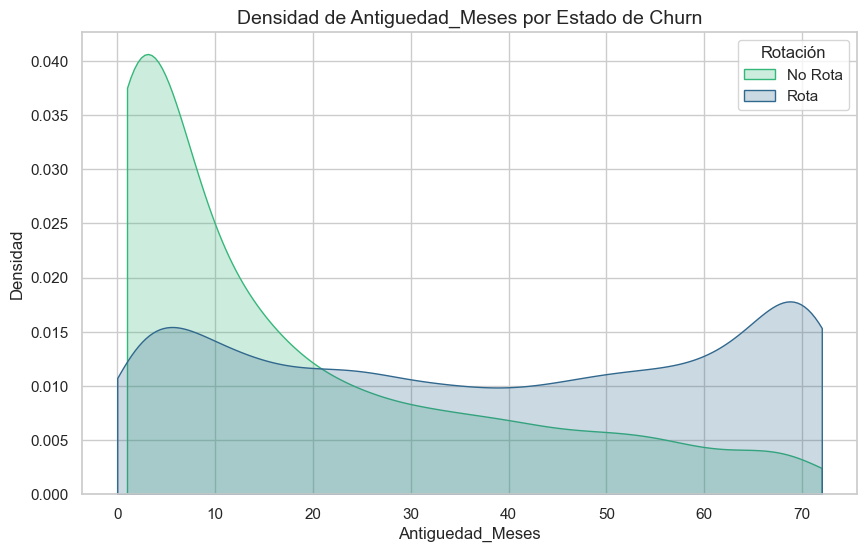


Analizando 'Cargos_Mensuales' en relación con 'Churn'


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\117801856.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='viridis')


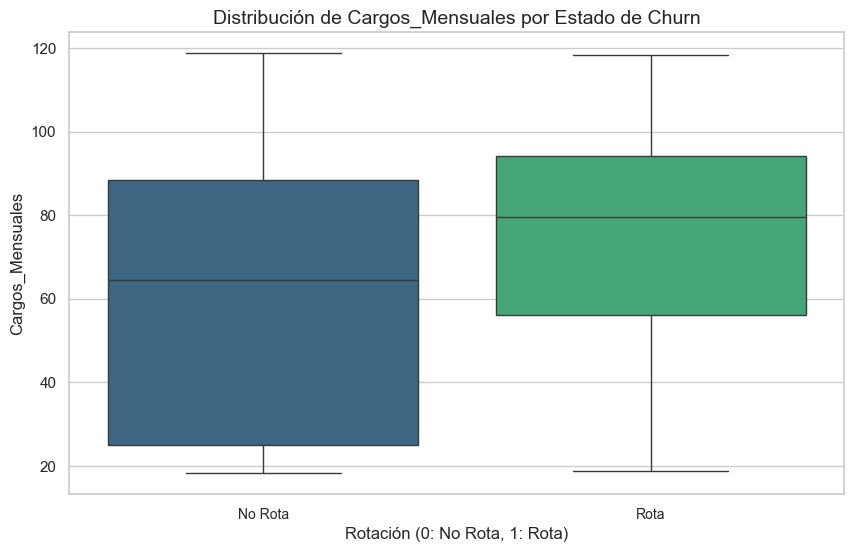

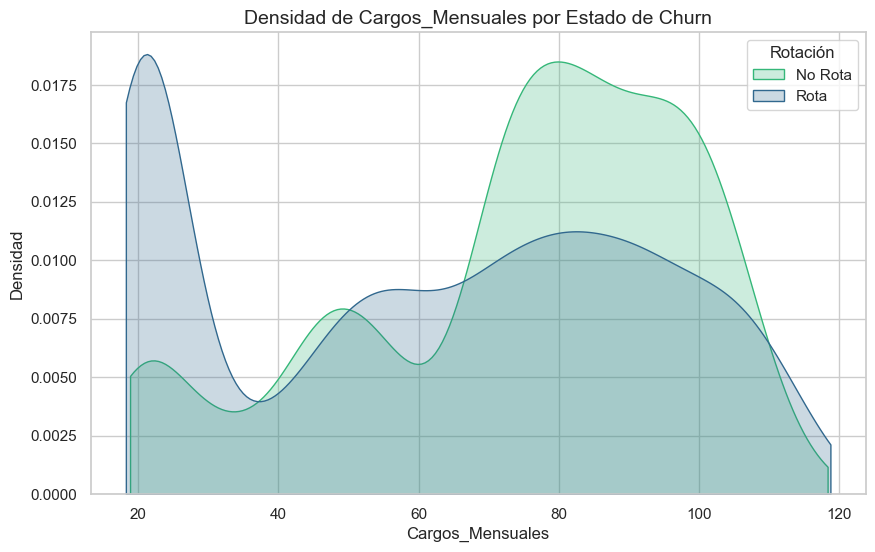


Analizando 'Cargos_Totales' en relación con 'Churn'


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\117801856.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='viridis')


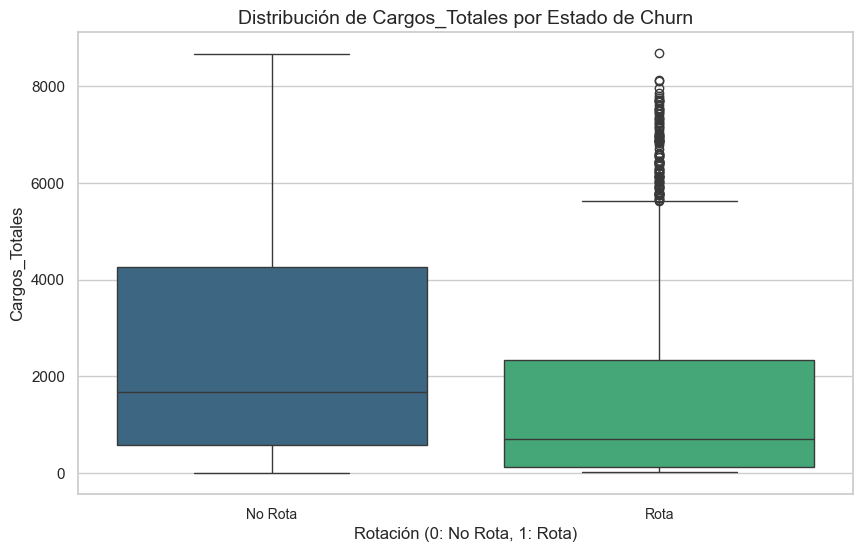

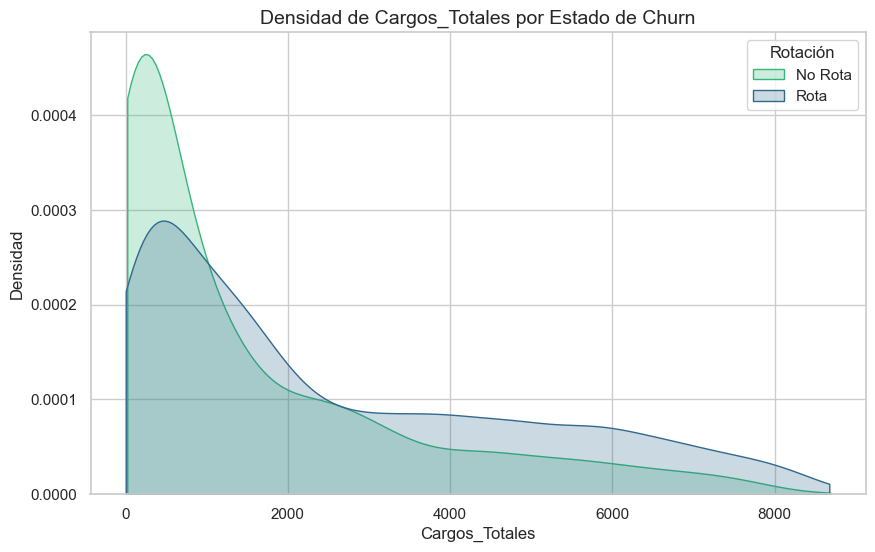


Analizando 'Cuentas_Diarias' en relación con 'Churn'


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\117801856.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_clientes, palette='viridis')


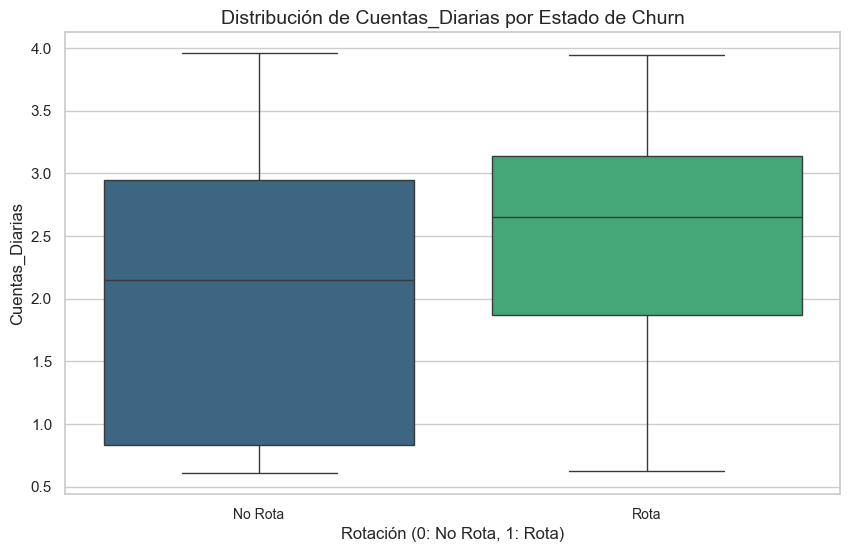

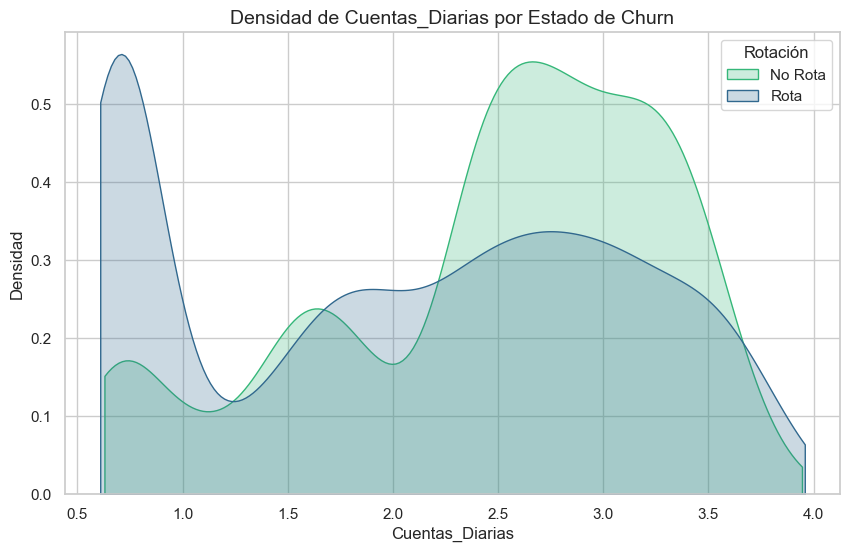


Análisis Exploratorio de Datos (EDA) completado.


In [16]:
# 1. Estadísticas Descriptivas para Columnas Numéricas
print(df_clientes.describe().T)

# 2. Recuento de Valores y Valores Únicos para Columnas Categóricas
columnas_categoricas_object = df_clientes.select_dtypes(include='object').columns

for col in columnas_categoricas_object:
    print(f"\n--- Columna: '{col}' ---")
    print(df_clientes[col].value_counts())
    print(f"Valores únicos: {df_clientes[col].unique()}")

# 3. Distribución de Churn
churn_counts = df_clientes['Churn'].value_counts()
churn_percentages = df_clientes['Churn'].value_counts(normalize=True) * 100
print("\nRecuento de Clientes por Estado de Churn:")
print(churn_counts)
print("\nPorcentaje de Clientes por Estado de Churn:")
print(churn_percentages.round(2))


# Si churn_counts tiene solo un valor, no podemos hacer un pie chart con explode o dos labels.
if len(churn_counts) == 2:
    labels_pie = ['No Rota (0)', 'Rota (1)']
    colors_pie = ["#90AF4C", "#3A33FF"]
    explode_pie = (0, 0.1) # Solo para dos categorías
elif len(churn_counts) == 1:
    # Si solo hay una categoría, ajustamos labels, colors y no usamos explode
    if 0 in churn_counts.index: # Si solo hay 'No Rota'
        labels_pie = ['No Rota (0)']
        colors_pie = ['#90AF4C']
    else: # Si solo hay 'Rota'
        labels_pie = ['Rota (1)']
        colors_pie = ['#3A33FF']
    explode_pie = (0,) # Tuple con un solo elemento
else:
    # Caso para más de 2 o 0 categorías, algo inesperado, usamos valores predeterminados
    labels_pie = [f"{idx} ({val})" for idx, val in churn_counts.items()]
    colors_pie = sns.color_palette("husl", len(churn_counts)) # Colores dinámicos
    explode_pie = [0.05] * len(churn_counts) # Un pequeño explode para todos

plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%', startangle=90, explode=explode_pie)
plt.title('Distribución de Clientes por Estado de Rotación (Churn)', fontsize=16)
plt.axis('equal')
plt.show()

plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df_clientes, palette=['#90AF4C', '#3A33FF'] if len(churn_counts) == 2 else 'viridis')
plt.title('Número de Clientes que Rotan vs. No Rotan', fontsize=16)
plt.xlabel('Estado de Rotación (Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
# Ajustar xticks dinámicamente si solo hay una categoría
if len(churn_counts) == 2:
    plt.xticks(ticks=[0, 1], labels=['No Rota', 'Rota'], fontsize=10)
elif 0 in churn_counts.index:
    plt.xticks(ticks=[0], labels=['No Rota'], fontsize=10)
elif 1 in churn_counts.index:
    plt.xticks(ticks=[1], labels=['Rota'], fontsize=10)
plt.show()

# 4. Correlación entre Variables Numéricas

# Aseguramos que las columnas numéricas relevantes sean de tipo numérico
columnas_numericas_para_corr = [
    'Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias',
    'Cliente_TerceraEdad', 'Cliente_Pareja', 'Cliente_Dependientes', 'Servicio_Telefono',
    'Multiples_Lineas', 'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas', 'Facturacion_Electronica',
    'Genero_Cliente', 'Churn'
]

# Filtramos solo las columnas que existen en el DataFrame
columnas_existentes_para_corr = [col for col in columnas_numericas_para_corr if col in df_clientes.columns]

# Forzar a numérico y rellenar NaN (seguridad extra, aunque ya se hizo antes)
for col in columnas_existentes_para_corr:
    df_clientes[col] = pd.to_numeric(df_clientes[col], errors='coerce').fillna(0.0)

corr_matrix = df_clientes[columnas_existentes_para_corr].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

# 5. Análisis Dirigido: Churn por variables categóricas
print("\n--- Análisis Dirigido: Churn por variables categóricas ---")
columnas_categoricas_para_analisis = [
    'Genero_Cliente', 'Cliente_TerceraEdad', 'Cliente_Pareja', 'Cliente_Dependientes',
    'Servicio_Telefono', 'Multiples_Lineas', 'Servicio_Internet', 'Seguridad_Online',
    'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV',
    'Streaming_Peliculas', 'Tipo_Contrato', 'Facturacion_Electronica', 'Metodo_Pago'
]

for col in columnas_categoricas_para_analisis:
    if col in df_clientes.columns:
        print(f"\nAnalizando '{col}' en relación con 'Churn'")
        churn_by_category = df_clientes.groupby(col)['Churn'].value_counts(normalize=True).mul(100).unstack()
        churn_by_category = churn_by_category.fillna(0)[[0, 1]] # Asegurarse de tener ambas columnas 0 y 1

        churn_by_category.plot(kind='bar', stacked=False, figsize=(9, 6), colormap='viridis')
        plt.title(f'Distribución Porcentual de Churn en relación con {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Porcentaje de Clientes', fontsize=12)
        plt.xticks(rotation=45, ha='right', fontsize=10)
        plt.legend(title='Rotación', labels=['No Rota', 'Rota'], bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Advertencia: Columna '{col}' no encontrada para análisis categórico.")

# 6. Análisis Dirigido: Churn por variables numéricas
columnas_numericas_para_analisis_eda = [
    'Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias'
]

for col in columnas_numericas_para_analisis_eda:
    if col in df_clientes.columns:
        print(f"\nAnalizando '{col}' en relación con 'Churn'")
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Churn', y=col, data=df_clientes, palette='viridis')
        plt.title(f'Distribución de {col} por Estado de Churn', fontsize=14)
        plt.xlabel('Rotación (0: No Rota, 1: Rota)', fontsize=12)
        plt.ylabel(col, fontsize=12)
        plt.xticks(ticks=[0, 1], labels=['No Rota', 'Rota'], fontsize=10)
        plt.show()

        plt.figure(figsize=(10, 6))
        sns.kdeplot(data=df_clientes, x=col, hue='Churn', fill=True, common_norm=False, palette='viridis', cut=0)
        plt.title(f'Densidad de {col} por Estado de Churn', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Densidad', fontsize=12)
        plt.legend(title='Rotación', labels=['No Rota', 'Rota'])
        plt.show()
    else:
        print(f"Advertencia: Columna '{col}' no encontrada para análisis numérico.")

print("\nAnálisis Exploratorio de Datos (EDA) completado.")

### Preparación Final para Modelado

In [17]:
# Creamos una copia del DataFrame para el procesamiento del modelado
df_procesado = df_clientes.copy()

# 1. Identificar variables categóricas para One-Hot Encoding
columnas_categoricas_para_ohe = df_procesado.select_dtypes(include='object').columns.tolist()

if 'ID_Cliente' in columnas_categoricas_para_ohe:
    columnas_categoricas_para_ohe.remove('ID_Cliente')
    print("Se excluyó 'ID_Cliente' de las columnas para One-Hot Encoding.")
if 'Churn' in columnas_categoricas_para_ohe: # Aunque Churn ya es numérica, es buena práctica verificar
    columnas_categoricas_para_ohe.remove('Churn')

print(f"\nColumnas categóricas identificadas para One-Hot Encoding: {columnas_categoricas_para_ohe}")

# Aplicar One-Hot Encoding
df_procesado = pd.get_dummies(df_procesado, columns=columnas_categoricas_para_ohe, drop_first=True)

print("\nDataFrame después del One-Hot Encoding (primeras 5 filas):")
print(df_procesado.head())
print(f"\nNuevas dimensiones del DataFrame después de OHE: {df_procesado.shape} (filas, columnas)")

# 2. Separar características (X) y variable objetivo (y)
# Asegurarse de que 'ID_Cliente' no esté en X
if 'ID_Cliente' in df_procesado.columns:
    X = df_procesado.drop(['ID_Cliente', 'Churn'], axis=1)
else:
    X = df_procesado.drop('Churn', axis=1)
    print("Advertencia: 'ID_Cliente' no se encontró en el DataFrame final X. Se asumió que ya fue manejada o no existía.")

y = df_procesado['Churn']

print(f"\nDimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (variable objetivo): {y.shape}")

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nDimensiones del conjunto de entrenamiento (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test, y_test): {X_test.shape}, {y_test.shape}")

# 4. Escalado de características numéricas
print("\n--- Realizando escalado de características numéricas (StandardScaler) ---")
scaler = StandardScaler()

# Identificamos las columnas que necesitan escalado (las numéricas que no son binarias 0/1, como las de OHE)
numeric_cols_to_scale = [
    col for col in X_train.columns
    if X_train[col].dtype in ['int64', 'float64'] and X_train[col].nunique() > 2
]

print(f"Columnas numéricas a escalar: {numeric_cols_to_scale}")

if len(numeric_cols_to_scale) > 0:
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    X_train_scaled[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
    X_test_scaled[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])

    print("\nPrimeras 5 filas de X_train (escalado):")
    print(X_train_scaled.head())
else:
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    print("No se encontraron columnas numéricas no binarias para escalar. X_train_scaled y X_test_scaled son copias de X_train y X_test.")

print("\nPreparación de datos para modelado completada.")

Se excluyó 'ID_Cliente' de las columnas para One-Hot Encoding.

Columnas categóricas identificadas para One-Hot Encoding: ['Servicio_Internet', 'Tipo_Contrato', 'Metodo_Pago']

DataFrame después del One-Hot Encoding (primeras 5 filas):
   ID_Cliente  Churn  Genero_Cliente  Cliente_TerceraEdad  Cliente_Pareja  \
0  0002-ORFBO      0               0                    0               1   
1  0003-MKNFE      0               1                    0               0   
2  0004-TLHLJ      1               1                    0               0   
3  0011-IGKFF      1               1                    1               1   
4  0013-EXCHZ      1               0                    1               1   

   Cliente_Dependientes  Antiguedad_Meses  Servicio_Telefono  \
0                     1                 9                  1   
1                     0                 9                  1   
2                     0                 4                  1   
3                     0                13    

### Modelado Predictivo y Evaluación


Métricas de evaluación para Regresión Logística:
Accuracy: 0.7928
Precision (Churn=1): 0.6340
Recall (Churn=1): 0.5187
F1-Score (Churn=1): 0.5706
ROC-AUC: 0.8432

Matriz de Confusión (Regresión Logística):
[[923 112]
 [180 194]]


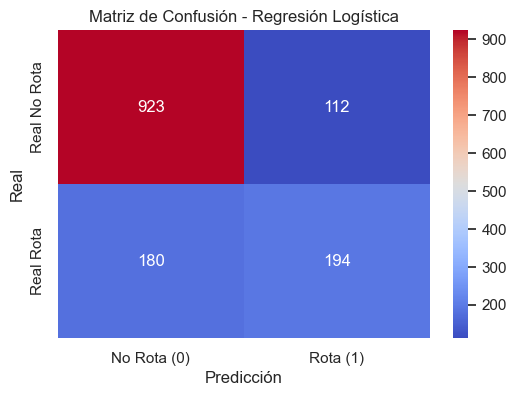


Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


--- Entrenando Modelo Random Forest ---

Métricas de evaluación para Random Forest:
Accuracy: 0.7850
Precision (Churn=1): 0.6282
Recall (Churn=1): 0.4652
F1-Score (Churn=1): 0.5346
ROC-AUC: 0.8246

Matriz de Confusión (Random Forest):
[[932 103]
 [200 174]]


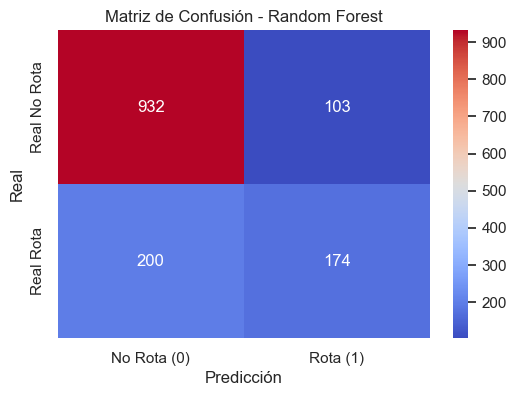


Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.63      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409


Resumen Comparativo de Métricas de Todos los Modelos.
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Regresion Logistica    0.7928     0.6340  0.5187    0.5706   0.8432
Random Forest          0.7850     0.6282  0.4652    0.5346   0.8246

Modelos entrenados y evaluados.


In [19]:
# Diccionario para guardar los modelos y sus métricas
modelos = {}
metricas = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

# --- Modelo 1: Regresión Logística ---
# 'liblinear' es un buen solver para datasets pequeños y medianos, y soporta penalización L1/L2
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_prob_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Probabilidades de la clase positiva (Churn=1)

modelos['Regresion Logistica'] = log_reg_model

print("\nMétricas de evaluación para Regresión Logística:")
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
precision_lr = precision_score(y_test, y_pred_log_reg)
recall_lr = recall_score(y_test, y_pred_log_reg)
f1_lr = f1_score(y_test, y_pred_log_reg)
roc_auc_lr = roc_auc_score(y_test, y_prob_log_reg)

metricas.loc['Regresion Logistica'] = [accuracy_lr, precision_lr, recall_lr, f1_lr, roc_auc_lr]

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision (Churn=1): {precision_lr:.4f}")
print(f"Recall (Churn=1): {recall_lr:.4f}")
print(f"F1-Score (Churn=1): {f1_lr:.4f}")
print(f"ROC-AUC: {roc_auc_lr:.4f}")

# Matriz de confusión para Regresión Logística
print("\nMatriz de Confusión (Regresión Logística):")
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print(cm_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Rota (0)', 'Rota (1)'], yticklabels=['Real No Rota', 'Real Rota'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_log_reg))

# --- Modelo 2: Random Forest ---
print("\n--- Entrenando Modelo Random Forest ---")
# n_estimators: número de árboles en el bosque
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

modelos['Random Forest'] = rf_model

print("\nMétricas de evaluación para Random Forest:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

metricas.loc['Random Forest'] = [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf]

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (Churn=1): {precision_rf:.4f}")
print(f"Recall (Churn=1): {recall_rf:.4f}")
print(f"F1-Score (Churn=1): {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

# Matriz de confusión para Random Forest
print("\nMatriz de Confusión (Random Forest):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Rota (0)', 'Rota (1)'], yticklabels=['Real No Rota', 'Real Rota'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

print("\nReporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("\nResumen Comparativo de Métricas de Todos los Modelos.")
print(metricas.round(4))

print("\nModelos entrenados y evaluados.")

### Intepretación de Resultados y Conclusiones.


Importancia de las Características (Variables) según Random Forest.

Top 15 Características más importantes para predecir Churn (Random Forest):
                   Caracteristica  Importancia
0                  Cargos_Totales     0.167265
1                Antiguedad_Meses     0.153108
2                 Cuentas_Diarias     0.135427
3                Cargos_Mensuales     0.134593
4   Servicio_Internet_Fiber optic     0.040442
5    Metodo_Pago_Electronic check     0.037774
6          Tipo_Contrato_Two year     0.031086
7                  Genero_Cliente     0.024768
8         Facturacion_Electronica     0.024505
9                 Soporte_Tecnico     0.022313
10               Seguridad_Online     0.022179
11                 Cliente_Pareja     0.021725
12         Tipo_Contrato_One year     0.021045
13            Cliente_TerceraEdad     0.018875
14                Respaldo_Online     0.018293


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\429506686.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='pastel')


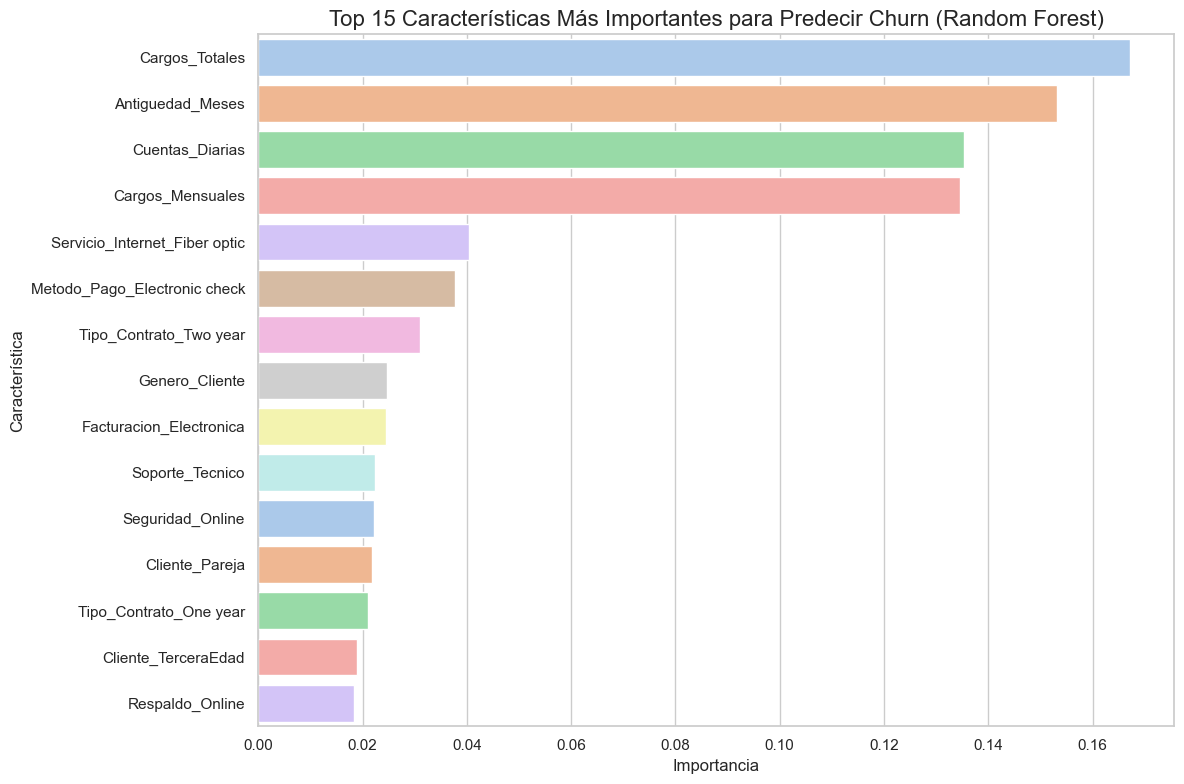


Coeficientes de la Regresión Logística (Influencia y Dirección)

Top 10 Características con mayor influencia (coeficientes) según Regresión Logística:
                  Caracteristica  Coeficiente
0               Antiguedad_Meses    -1.409892
1         Tipo_Contrato_Two year    -1.323378
2              Servicio_Telefono    -0.752174
3         Tipo_Contrato_One year    -0.679272
4                 Cargos_Totales     0.677092
5           Servicio_Internet_No    -0.634286
6  Servicio_Internet_Fiber optic     0.539757
7                Soporte_Tecnico    -0.467997
8   Metodo_Pago_Electronic check     0.397349
9               Seguridad_Online    -0.375190


C:\Users\hp\AppData\Local\Temp\ipykernel_37216\429506686.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')


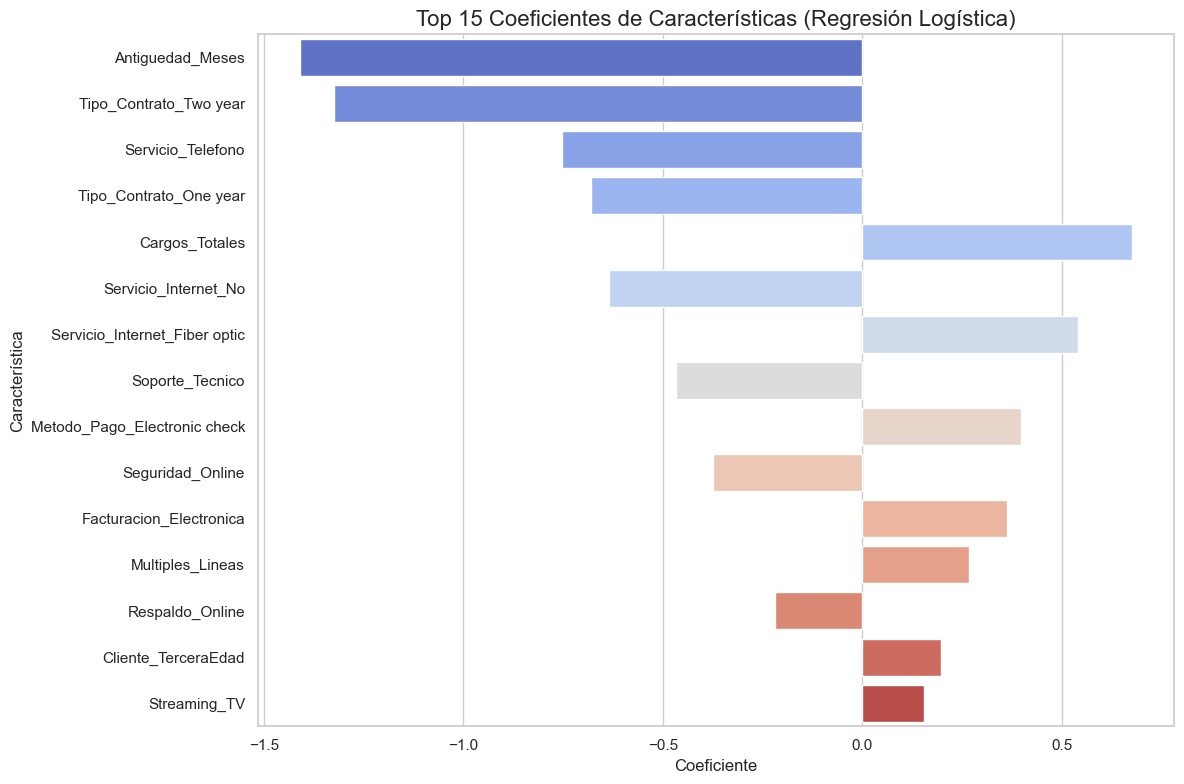

In [20]:
# 1. Análisis de Importancia de Variables (Random Forest)
print("\nImportancia de las Características (Variables) según Random Forest.")

if not isinstance(X_train_scaled, pd.DataFrame):
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)

feature_importances = rf_model.feature_importances_
importancia_df = pd.DataFrame({
    'Caracteristica': X_train_scaled.columns,
    'Importancia': feature_importances
})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False).reset_index(drop=True)

print("\nTop 15 Características más importantes para predecir Churn (Random Forest):")
print(importancia_df.head(15))

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Caracteristica', data=importancia_df.head(15), palette='pastel')
plt.title('Top 15 Características Más Importantes para Predecir Churn (Random Forest)', fontsize=16)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show()

# 2. Coeficientes de Regresión Logística (para entender la dirección de la influencia)
print("\nCoeficientes de la Regresión Logística (Influencia y Dirección)")
coeficientes_df = pd.DataFrame({
    'Caracteristica': X_train_scaled.columns,
    'Coeficiente': log_reg_model.coef_[0]
})
coeficientes_df['Abs_Coeficiente'] = coeficientes_df['Coeficiente'].abs()
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False).reset_index(drop=True)

print("\nTop 10 Características con mayor influencia (coeficientes) según Regresión Logística:")
print(coeficientes_df.drop('Abs_Coeficiente', axis=1).head(10))

plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Caracteristica', data=coeficientes_df.head(15), palette='coolwarm')
plt.title('Top 15 Coeficientes de Características (Regresión Logística)', fontsize=16)
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Característica', fontsize=12)
plt.tight_layout()
plt.show()